In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,ID,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,1,45,0,0,0,0,155,57,0,0,0,25000
1,2,60,1,0,0,0,180,73,0,0,0,29000
2,3,36,1,1,0,0,158,59,0,0,1,23000
3,4,52,1,1,0,1,183,93,0,0,2,28000
4,5,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       986 non-null    int64
 1   Age                      986 non-null    int64
 2   Diabetes                 986 non-null    int64
 3   BloodPressureProblems    986 non-null    int64
 4   AnyTransplants           986 non-null    int64
 5   AnyChronicDiseases       986 non-null    int64
 6   Height                   986 non-null    int64
 7   Weight                   986 non-null    int64
 8   KnownAllergies           986 non-null    int64
 9   HistoryOfCancerInFamily  986 non-null    int64
 10  NumberOfMajorSurgeries   986 non-null    int64
 11  PremiumPrice             986 non-null    int64
dtypes: int64(12)
memory usage: 92.6 KB


#### Summary Statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,986.0,493.500000,284.777984,1.0,247.25,493.5,739.75,986.0
Age,986.0,41.745436,13.963371,18.0,30.00,42.0,53.00,66.0
Diabetes,986.0,0.419878,0.493789,0.0,0.00,0.0,1.00,1.0
BloodPressureProblems,986.0,0.468560,0.499264,0.0,0.00,0.0,1.00,1.0
AnyTransplants,986.0,0.055781,0.229615,0.0,0.00,0.0,0.00,1.0
AnyChronicDiseases,986.0,0.180527,0.384821,0.0,0.00,0.0,0.00,1.0
Height,986.0,168.182556,10.098155,145.0,161.00,168.0,176.00,188.0
Weight,986.0,76.950304,14.265096,51.0,67.00,75.0,87.00,132.0
KnownAllergies,986.0,0.215010,0.411038,0.0,0.00,0.0,0.00,1.0
HistoryOfCancerInFamily,986.0,0.117647,0.322353,0.0,0.00,0.0,0.00,1.0


#### Univariate Analysis

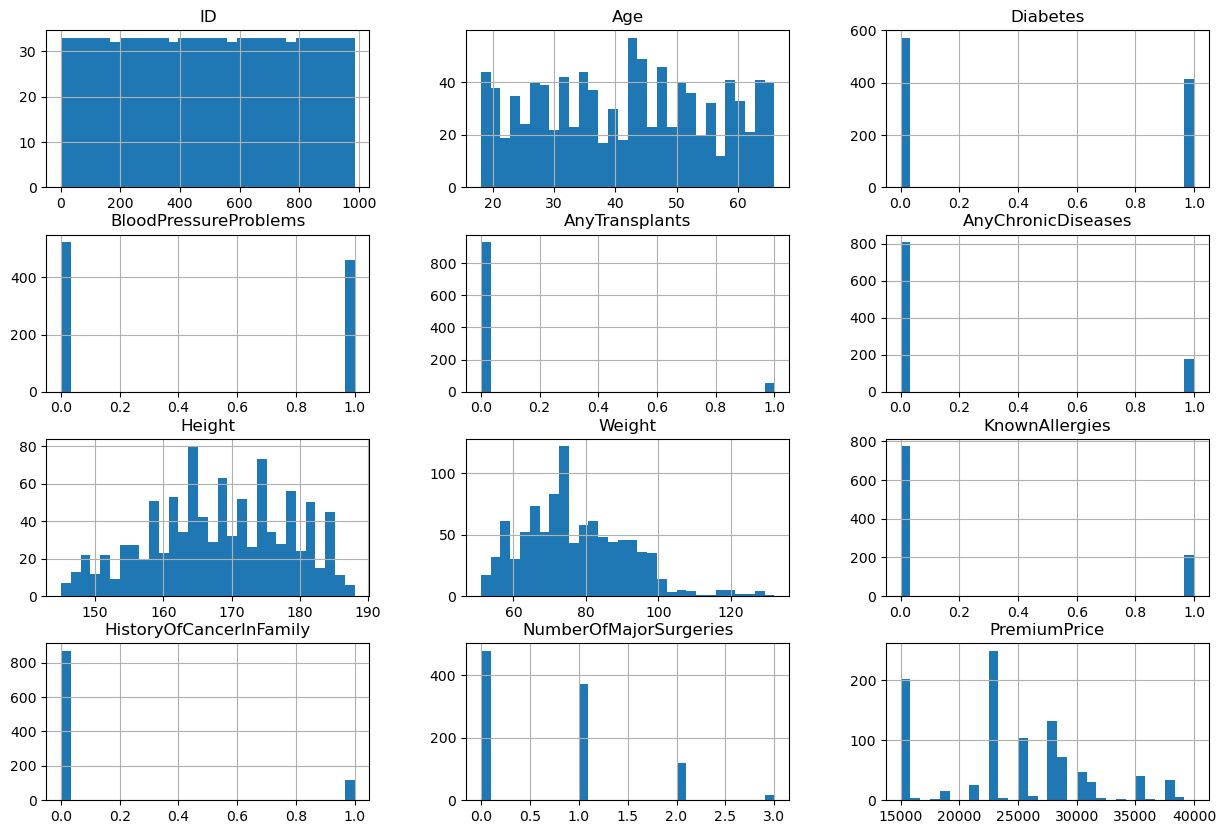

In [6]:
df.hist(bins = 30, figsize = (15, 10))
plt.show()

#### Multivariate Analysis

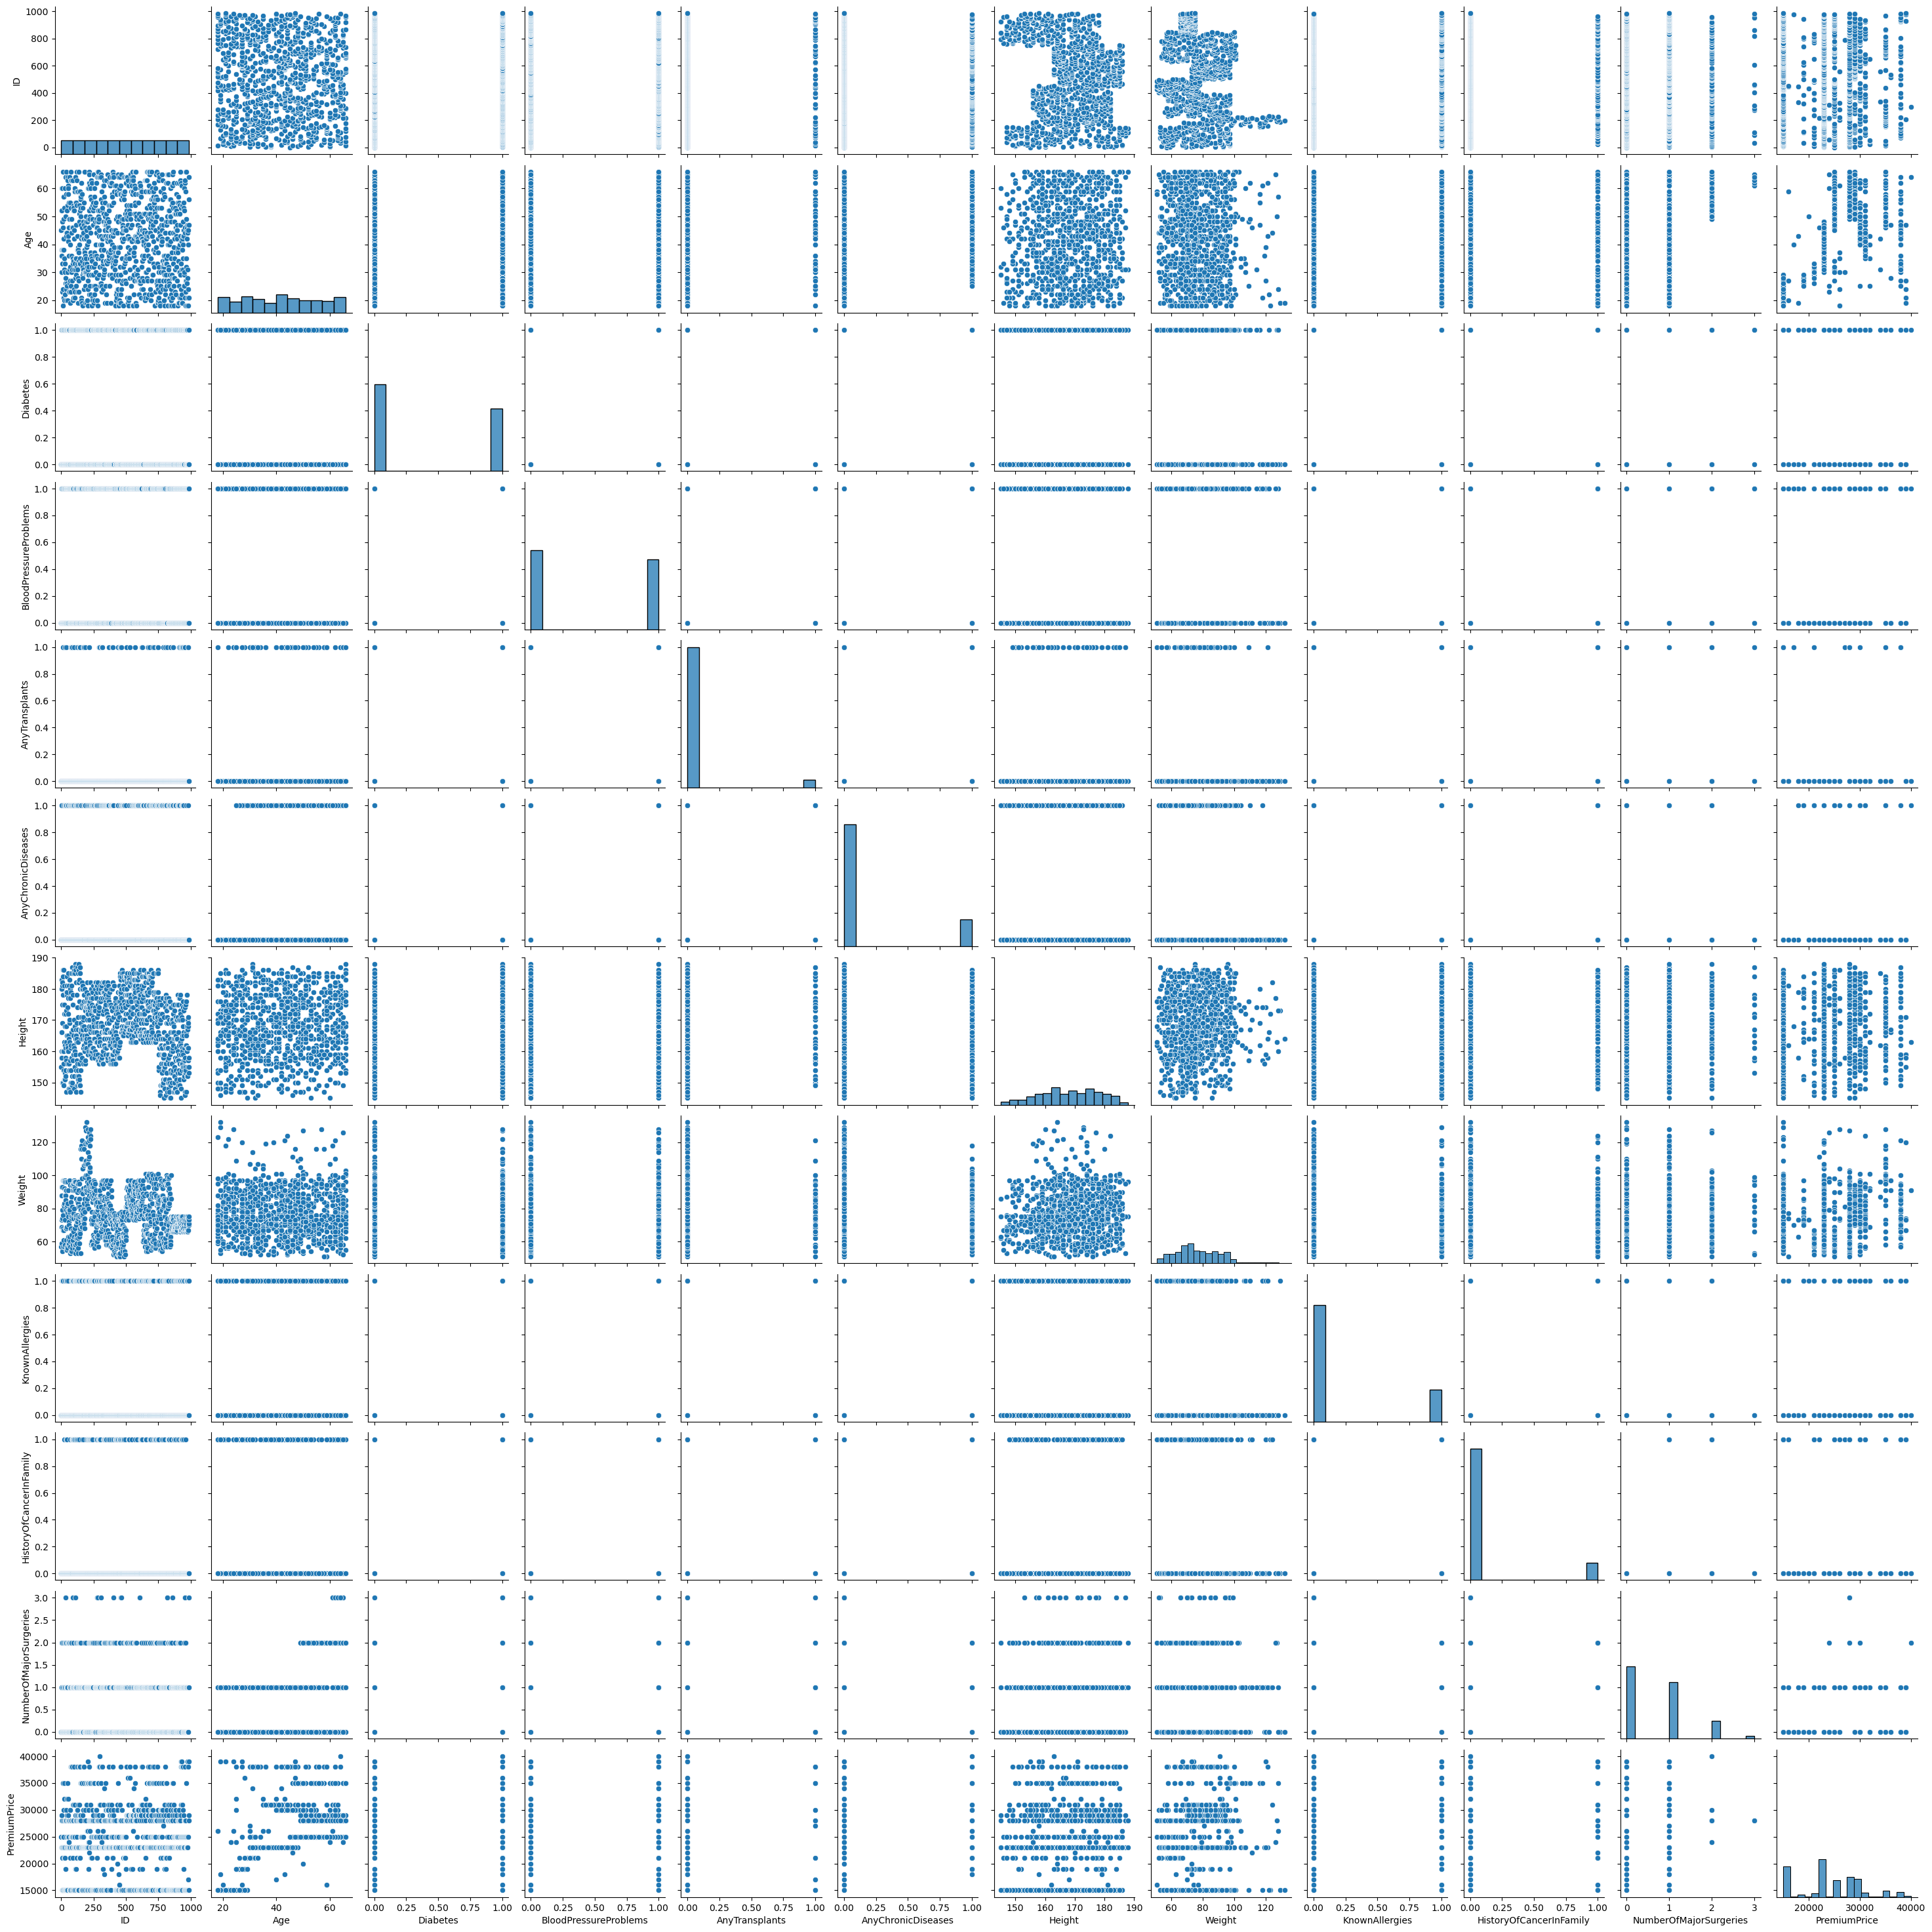

In [7]:
sns.pairplot(df)
plt.show()

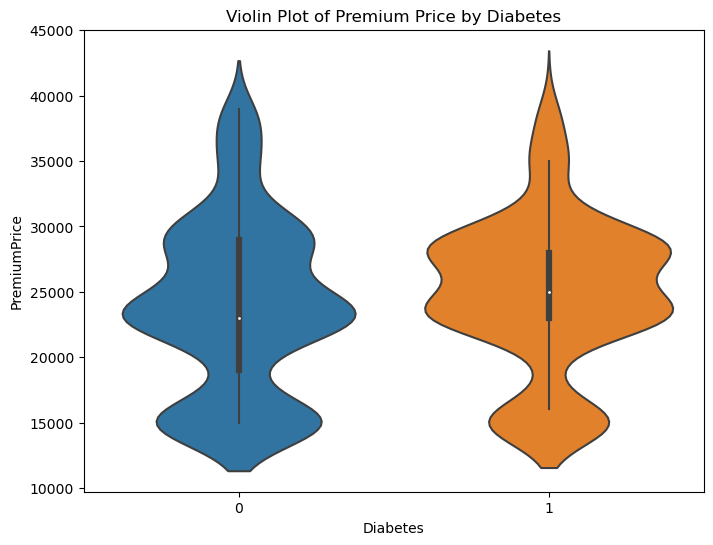

In [8]:
plt.figure(figsize = (8, 6))
sns.violinplot(x = 'Diabetes', y = 'PremiumPrice', data = df)
plt.title('Violin Plot of Premium Price by Diabetes')
plt.show()

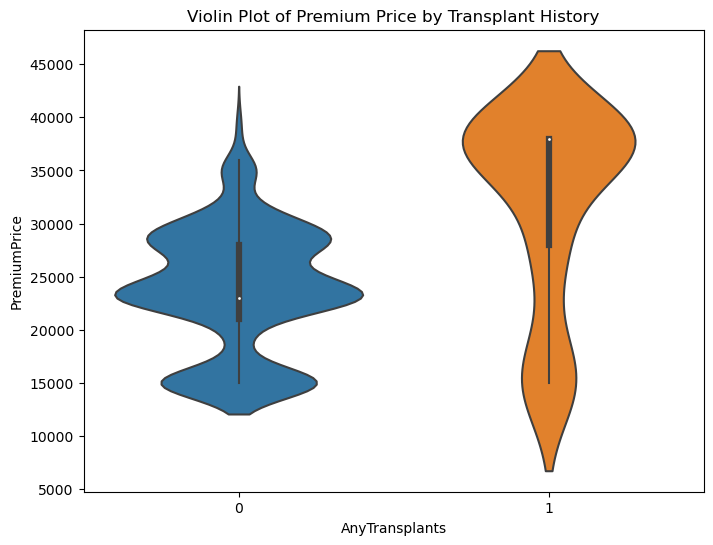

In [9]:
plt.figure(figsize = (8, 6))
sns.violinplot(x = 'AnyTransplants', y = 'PremiumPrice', data = df)
plt.title('Violin Plot of Premium Price by Transplant History')
plt.show()

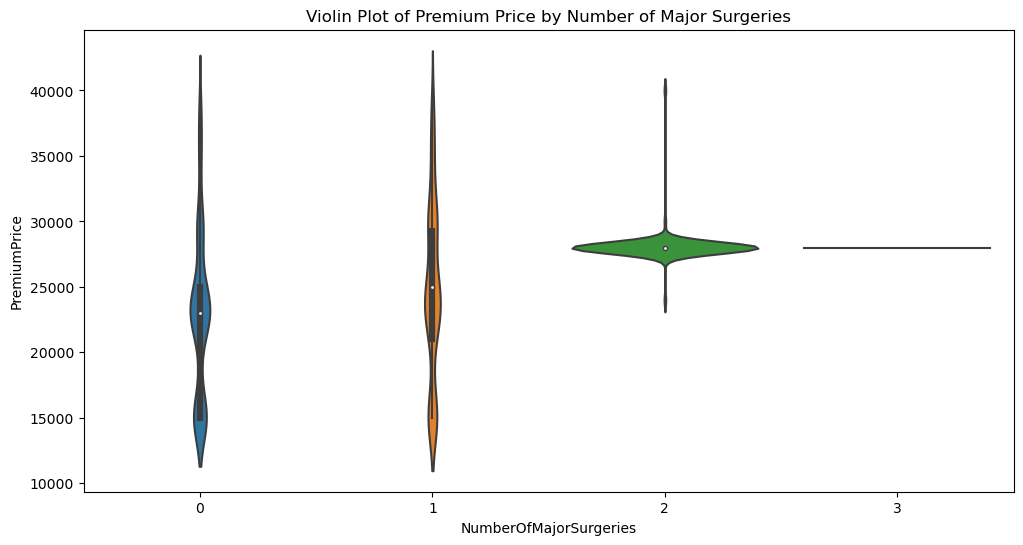

In [10]:
plt.figure(figsize = (12, 6))
sns.violinplot(x = 'NumberOfMajorSurgeries', y = 'PremiumPrice', data = df)
plt.title('Violin Plot of Premium Price by Number of Major Surgeries')
plt.show()

#### Heatmap for Correlation

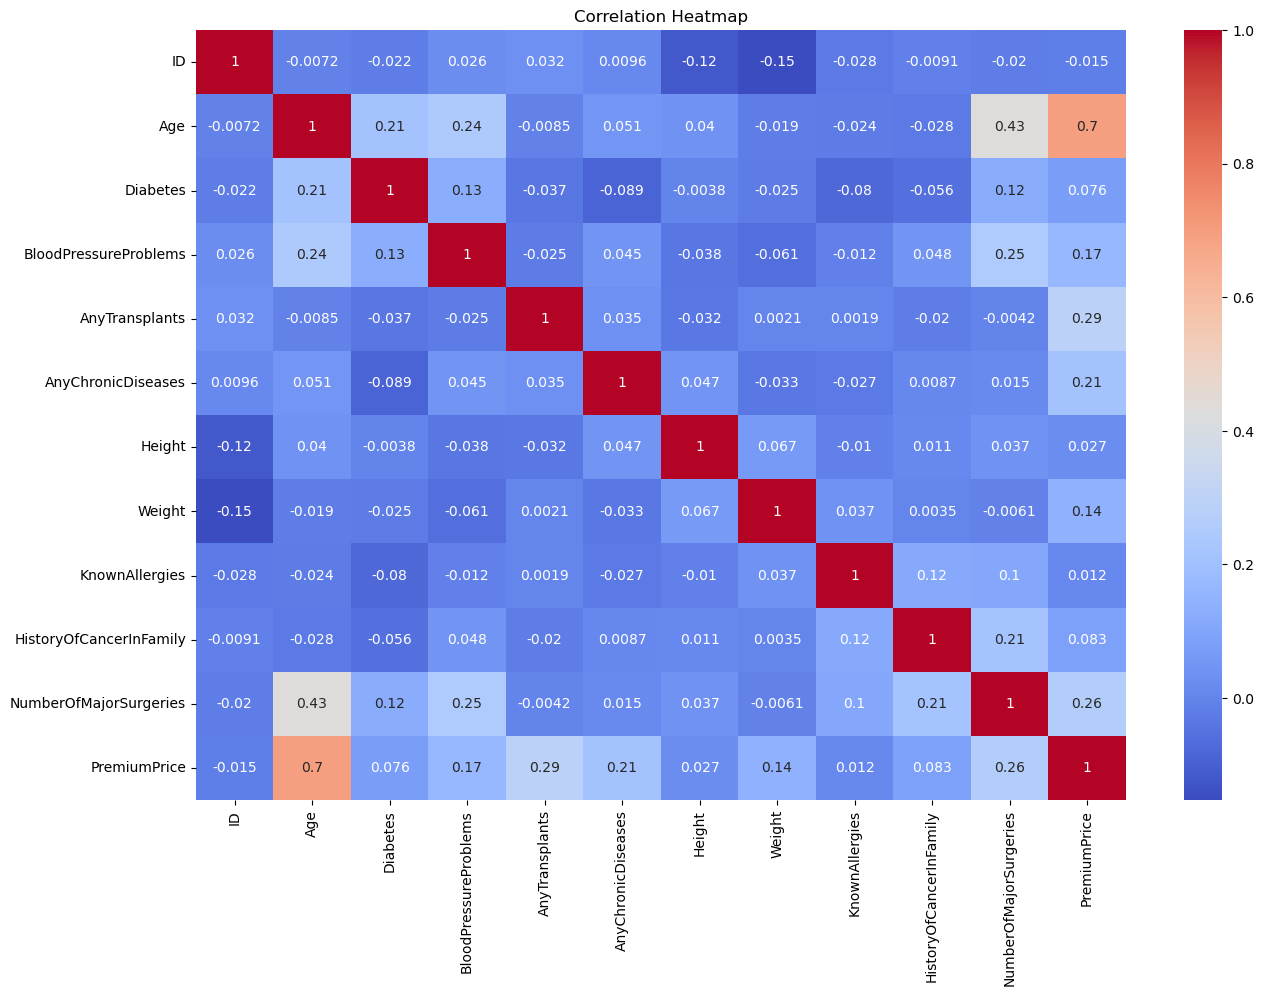

In [11]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Hypothesis Testing

1. Comparing Premium Prices for Different Groups (T-test/ANOVA)  

Hypothesis: Are premium costs significantly higher for individuals with chronic diseases compared to those without?

In [15]:
import scipy.stats as stats

group1 = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']
group2 = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']

t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 6.69104572734849, p-value: 3.713413765291482e-11


##### p-value is less than 0.05. Hence, we reject the null hypothesis that there is no difference in premium costs between individuals with chronic diseases and those without.

2. Association between Categorical Variables (Chi-square Test)

Hypothesis: Is there an association between the presence of diabetes and the presence of blood pressure problems?

In [16]:
contingency_table = pd.crosstab(df['Diabetes'], df['BloodPressureProblems'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")

Chi-square statistic: 15.571225392078397, P-value: 7.945461025980538e-05


##### p-value is less than 0.05. Hence, we reject the null hypothesis that there is no association between the presence of diabetes and the presence of blood pressure problems

Hypothesis: Is there an association between the presence of chronic disease and history of cancer in family?

In [17]:
contingency_table_2 = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table_2)
print(f"Chi-square statistic: {chi2_stat}, P-value: {p_value}")

Chi-square statistic: 0.02062393388215223, P-value: 0.8858081638149811


##### p-value is greater than 0.05. Hence, we cannot reject the null hypothesis that there is no association between the presence of chronic disease and thistory of cancer in family

3. Impact of Multiple Factors on Premium Prices (ANOVA) 

Hypothesis: Is there a significant difference in premium prices based on the number of major surgeries?

In [18]:
f_stat, p_value = stats.f_oneway(
    df[df['NumberOfMajorSurgeries'] == 0]['PremiumPrice'],
    df[df['NumberOfMajorSurgeries'] == 1]['PremiumPrice'],
    df[df['NumberOfMajorSurgeries'] == 2]['PremiumPrice'],
    df[df['NumberOfMajorSurgeries'] == 3]['PremiumPrice']
)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 26.13539359740762, P-value: 2.8711631377228097e-16


##### p-value is less than 0.05. Hence, we reject the null hypothesis that there is no difference in premium prices based on the number of major surgeries

4. Linear Relationship Between Variables (Linear Regression)  

Hypothesis: Does age significantly predict premium price?

In [19]:
import statsmodels.api as sm

X = df['Age']
y = df['PremiumPrice']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     932.5
Date:                Tue, 23 Jul 2024   Prob (F-statistic):          1.32e-144
Time:                        11:52:13   Log-Likelihood:                -9687.6
No. Observations:                 986   AIC:                         1.938e+04
Df Residuals:                     984   BIC:                         1.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.131e+04    449.911     25.131      0.0

##### Both the intercept and the slope have very high t-values and p-values of 0.000, indicating that they are statistically significant.